In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Dropout,Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
%matplotlib inline


In [2]:
data=pd.read_csv('C:/Users/user/Desktop/MathsAI/Jupyter/train.csv')

In [3]:
data.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [4]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<AxesSubplot:>

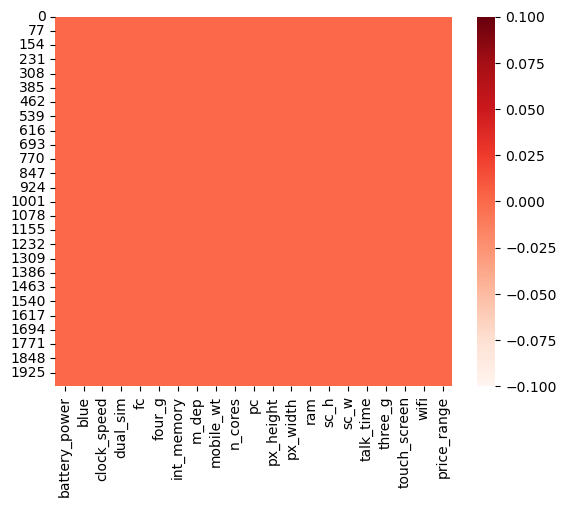

In [6]:
sns.heatmap(data.isnull(),cmap='Reds')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='battery_power'>

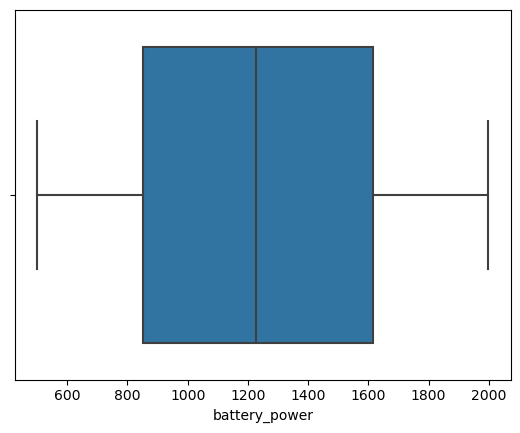

In [7]:
#Check for outliers
sns.boxplot('battery_power',data=data)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
data.shape

(2000, 21)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

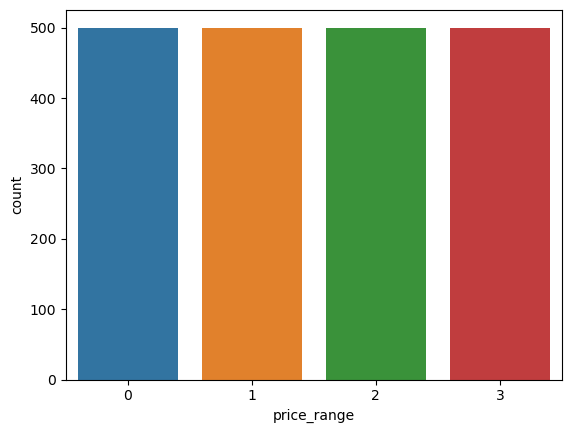

In [10]:
# Data Visualisation
sns.countplot('price_range',data=data)

In [11]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [13]:
# Feature Engineering


In [14]:
# Normalisation

In [15]:
# Get x & Y VALUES
x=data.drop('price_range',axis=1)

In [16]:
y=data['price_range']
y=pd.get_dummies(y)
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=mms.fit_transform(x) # MinMaxScaler # StandardScaler

In [17]:
# Get Test DataSet

In [18]:
data1=pd.read_csv('C:/Users/user/Desktop/MathsAI/Jupyter/test.csv')

In [19]:
data1.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5 non-null      int64  
 1   battery_power  5 non-null      int64  
 2   blue           5 non-null      int64  
 3   clock_speed    5 non-null      float64
 4   dual_sim       5 non-null      int64  
 5   fc             5 non-null      int64  
 6   four_g         5 non-null      int64  
 7   int_memory     5 non-null      int64  
 8   m_dep          5 non-null      float64
 9   mobile_wt      5 non-null      int64  
 10  n_cores        5 non-null      int64  
 11  pc             5 non-null      int64  
 12  px_height      5 non-null      int64  
 13  px_width       5 non-null      int64  
 14  ram            5 non-null      int64  
 15  sc_h           5 non-null      int64  
 16  sc_w           5 non-null      int64  
 17  talk_time      5 non-null      int64  
 18  three_g       

In [20]:
y

,0,1,2,3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
1995,1,0,0,0
1996,0,0,1,0
1997,0,0,0,1
1998,1,0,0,0


In [21]:
#Split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)# Random State

In [22]:
x_train.shape

(1600, 20)

In [23]:
# Model Creation

model=Sequential()
model.add(Dense(4,activation='relu',input_shape=(20,),kernel_regularizer='l2'))
# model.add(BatchNormalization())
model.add(Dense(8,activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(Dense(32,activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
          

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 84        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 544
Trainable params: 544
Non-trainable params: 0
_________________________________________________________________


In [25]:
#Model Compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [26]:
history=model.fit(x_train,y_train,batch_size=15,validation_data=(x_test,y_test),epochs=76)

Epoch 1/76
107/107 [==============================] - 2s 6ms/step - loss: 1.4385 - acc: 0.2531 - val_loss: 1.4167 - val_acc: 0.2650
Epoch 2/76
107/107 [==============================] - 0s 3ms/step - loss: 1.3950 - acc: 0.3281 - val_loss: 1.3659 - val_acc: 0.3525
Epoch 3/76
107/107 [==============================] - 0s 3ms/step - loss: 1.2581 - acc: 0.4456 - val_loss: 1.1273 - val_acc: 0.4850
Epoch 4/76
107/107 [==============================] - 0s 3ms/step - loss: 0.9504 - acc: 0.5856 - val_loss: 0.8289 - val_acc: 0.6600
Epoch 5/76
107/107 [==============================] - 0s 3ms/step - loss: 0.7206 - acc: 0.7412 - val_loss: 0.6302 - val_acc: 0.7975
Epoch 6/76
107/107 [==============================] - 0s 3ms/step - loss: 0.5729 - acc: 0.8131 - val_loss: 0.5025 - val_acc: 0.8525
Epoch 7/76
107/107 [==============================] - 0s 3ms/step - loss: 0.4730 - acc: 0.8512 - val_loss: 0.4388 - val_acc: 0.8525
Epoch 8/76
107/107 [==============================] - 0s 3ms/step - loss: 0.

In [27]:
los,acc=model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.1192 - acc: 0.9725


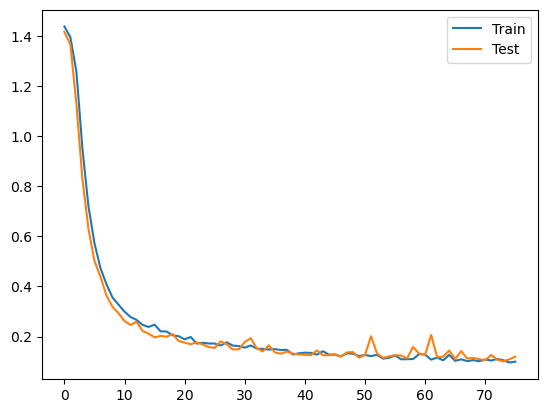

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Test'])

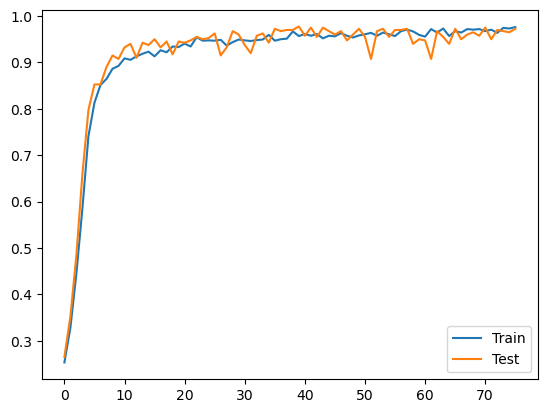

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train','Test'])

In [30]:
# Model(4,8,32,4) wth Batch Normal
# batchsize=50,loss=categorical,epochs=76
# optimizer-sgd(acc(.925,.927))
# optimizer-adam(acc(.933,.932))

# batchsize=32--acc(.938,.920)

# ------------------
# With Dropout



In [34]:
# Prediction
datat=pd.read_csv('C:/Users/user/Desktop/MathsAI/Jupyter/test.csv')

datat

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [35]:

x=datat.drop('id',axis=1)

In [36]:
a=model.predict(x)

32/32 [==============================] - 0s 2ms/step


In [41]:
a=a[1]

In [42]:
print(np.argmax(a))

0
